# <center>**Home Credit Default Risk**
---
<center> by Vicky Tanamal

# Libraries

In [547]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Import Data

In [548]:
# Training data
train_data = pd.read_csv('application_train.csv')
print('Data shape:', train_data.shape)
train_data.head()

Data shape: (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [549]:
# Testing data
test_data = pd.read_csv('application_test.csv')
print('Data shape:', test_data.shape)
test_data.head()

Data shape: (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married

# Define Target

In [550]:
train_data['TARGET'].value_counts(normalize = True) * 100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

Target is the variable that we want to predict. From the information we got, we can see the data is imbalanced.
- 0 -> loan repaid on time
- 1 -> there are difficulties on payment

<AxesSubplot:xlabel='TARGET', ylabel='count'>

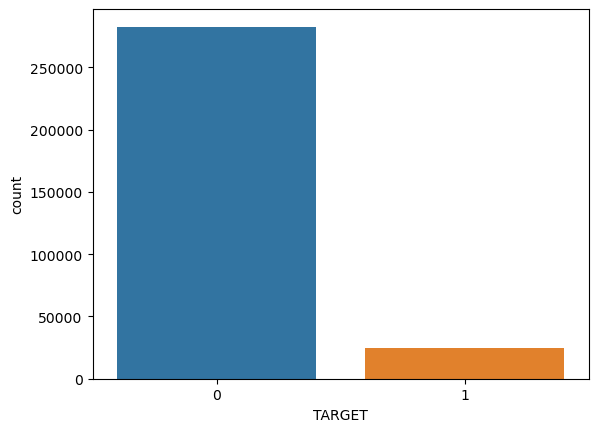

In [596]:
sns.countplot(data=train_data, x='TARGET')

# Exploratory Data Analysis

In [551]:
# Number of each type of column
train_data.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [552]:
# Checking number of unique data in categorical columns
train_data.select_dtypes(include='object').nunique()

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [553]:
train_data.select_dtypes(exclude='object').nunique()

SK_ID_CURR                      307511
TARGET                               2
CNT_CHILDREN                        15
AMT_INCOME_TOTAL                  2548
AMT_CREDIT                        5603
AMT_ANNUITY                      13672
AMT_GOODS_PRICE                   1002
REGION_POPULATION_RELATIVE          81
DAYS_BIRTH                       17460
DAYS_EMPLOYED                    12574
DAYS_REGISTRATION                15688
DAYS_ID_PUBLISH                   6168
OWN_CAR_AGE                         62
FLAG_MOBIL                           2
FLAG_EMP_PHONE                       2
FLAG_WORK_PHONE                      2
FLAG_CONT_MOBILE                     2
FLAG_PHONE                           2
FLAG_EMAIL                           2
CNT_FAM_MEMBERS                     17
REGION_RATING_CLIENT                 3
REGION_RATING_CLIENT_W_CITY          3
HOUR_APPR_PROCESS_START             24
REG_REGION_NOT_LIVE_REGION           2
REG_REGION_NOT_WORK_REGION           2
LIVE_REGION_NOT_WORK_REGI

## Feauture Contract Type 

In [554]:
train_data['NAME_CONTRACT_TYPE'].value_counts(normalize=True) * 100

Cash loans         90.478715
Revolving loans     9.521285
Name: NAME_CONTRACT_TYPE, dtype: float64

In [555]:
contract_type = train_data.groupby(['NAME_CONTRACT_TYPE','TARGET']).aggregate({'SK_ID_CURR' : 'count'}).reset_index()
contract_type['RATIO'] = 100 * contract_type['SK_ID_CURR']/contract_type.groupby('NAME_CONTRACT_TYPE')['SK_ID_CURR'].transform('sum')
contract_type

,NAME_CONTRACT_TYPE,TARGET,SK_ID_CURR,RATIO
0,Cash loans,0,255011,91.654087
1,Cash loans,1,23221,8.345913
2,Revolving loans,0,27675,94.521671
3,Revolving loans,1,1604,5.478329


Text(0.5, 1.0, 'Contract Types by Target')

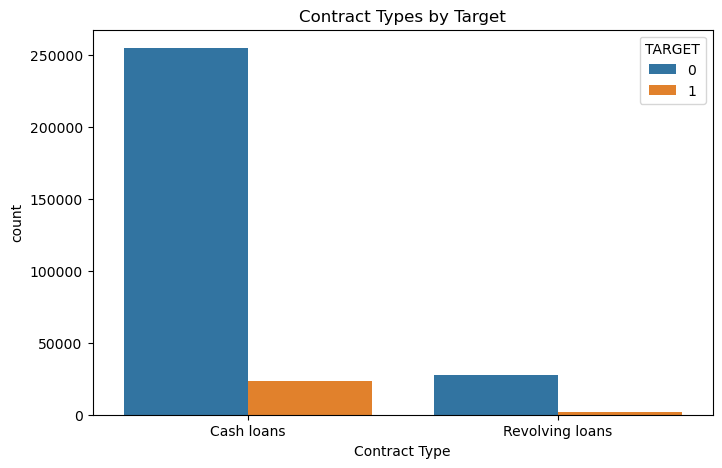

In [556]:
plt.figure(figsize=(8,5))
sns.countplot(data=train_data, x='NAME_CONTRACT_TYPE', hue='TARGET')
plt.xlabel('Contract Type')
plt.title('Contract Types by Target') 

From the chart above, we can wee that cash loans is the majority for the contract type. The ratio for loan not repaid for cash loans is 8.34%, while the ratio of loans not repaid for revolving loan is 5.45%. Revolving loan has ratio not repaid lower than cash loan.

## Feature CODE_GENDER

In [557]:
train_data['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

Text(0.5, 1.0, 'Code Gender by Target Value')

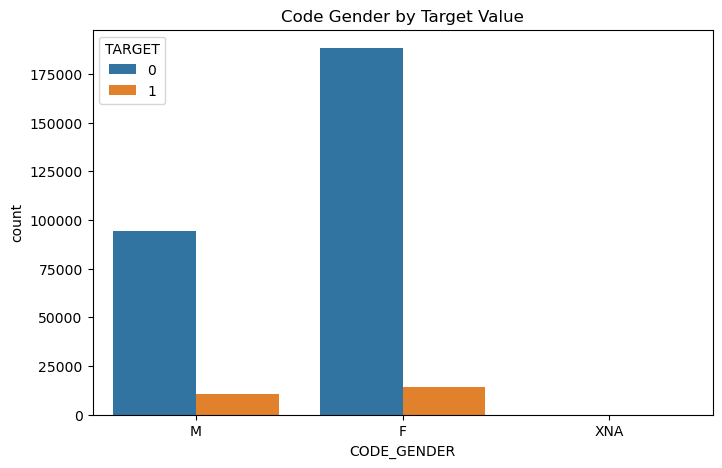

In [558]:
plt.figure(figsize=(8,5))
sns.countplot(data=train_data, x='CODE_GENDER', hue='TARGET')
plt.title('Code Gender by Target Value')

From the chart we can wee that most of clients are Female

## Feature Days Birth

In [559]:
age = train_data['DAYS_BIRTH']/-365
age.describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

Text(0, 0.5, 'Count')

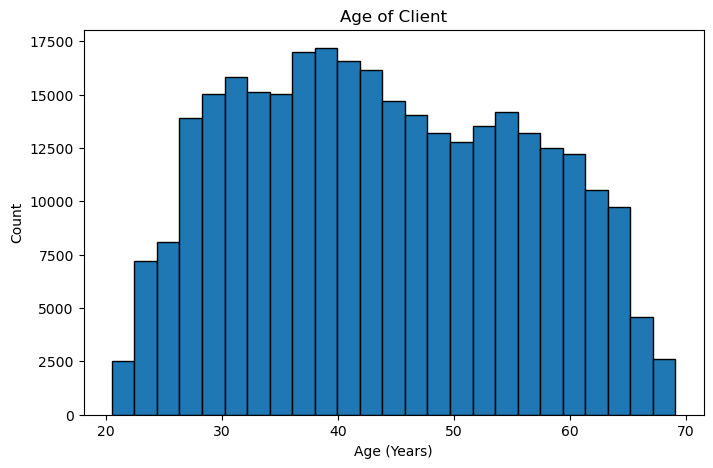

In [560]:
# Check age of client
plt.figure(figsize=(8,5))
plt.hist(train_data['DAYS_BIRTH']/-365, edgecolor='k', bins=25)
plt.title('Age of Client'); plt.xlabel('Age (Years)'); plt.ylabel('Count')

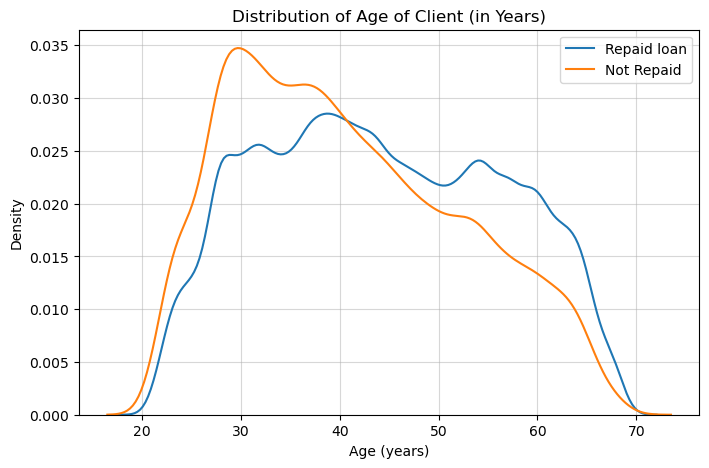

In [561]:
# Check the distribution 
plt.figure(figsize=(8,5))
plt.grid(True, alpha=0.5)
sns.kdeplot(train_data.loc[train_data['TARGET']==0, 'DAYS_BIRTH']/ -365, label = 'Repaid loan')
sns.kdeplot(train_data.loc[train_data['TARGET']==1, 'DAYS_BIRTH']/ -365, label= 'Not Repaid')
plt.xlabel('Age (years)'); plt.title('Distribution of Age of Client (in Years)'); plt.legend()

The younger clients are more likely have the difficulties to pay the loan.

## Feature AMT_CREDIT

In [562]:
train_data['AMT_CREDIT'].describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

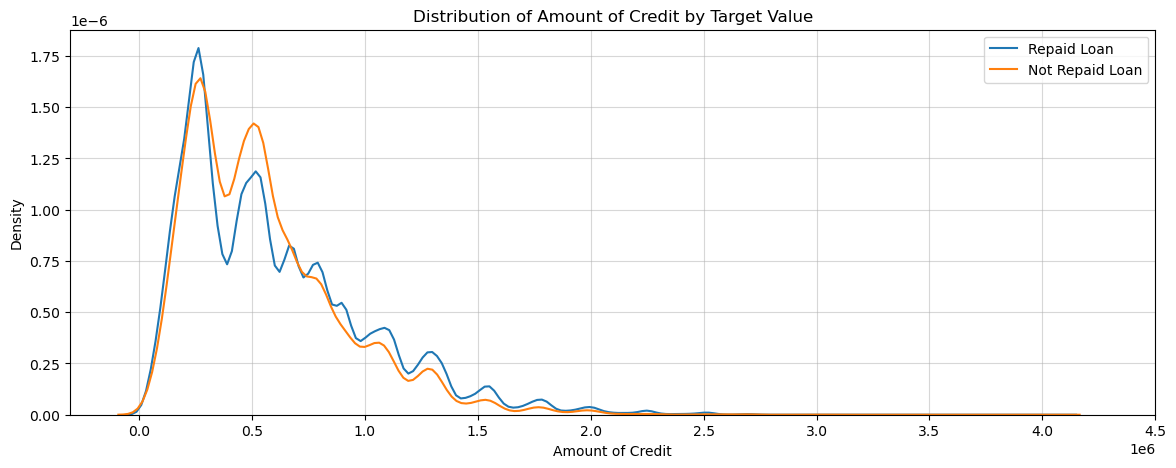

In [563]:
plt.figure(figsize=(14,5))
plt.grid(True, alpha=0.5)
sns.kdeplot(train_data.loc[train_data['TARGET'] == 0, 'AMT_CREDIT'], label = 'Repaid Loan')
sns.kdeplot(train_data.loc[train_data['TARGET'] == 1, 'AMT_CREDIT'], label = 'Not Repaid Loan')
plt.xlabel('Amount of Credit') ; plt.xticks(np.arange(0, 5000000, 500000))
plt.title('Distribution of Amount of Credit by Target Value')
plt.legend()

As we can see in the plot above, the distribution of repaid and not repaid loan have similiar distribution which is repaid loan ration is higher than not repaid loan. But, in the area 500.000 not repaid loan has higher ratio.

## Correlation

In [564]:
correlations = train_data.corr()['TARGET'].sort_values()
print('Most positive correlations: \n', correlations.tail(11))
print('Most negative correlations: \n', correlations.head(10))

Most positive correlations: 
 DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64
Most negative correlations: 
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
Name: TARGET, dtype: float64


In [565]:
correlations.tail(11).index

Index(['DAYS_REGISTRATION', 'FLAG_DOCUMENT_3', 'REG_CITY_NOT_LIVE_CITY',
       'FLAG_EMP_PHONE', 'REG_CITY_NOT_WORK_CITY', 'DAYS_ID_PUBLISH',
       'DAYS_LAST_PHONE_CHANGE', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'DAYS_BIRTH', 'TARGET'],
      dtype='object')

In [566]:
train_data_corr = train_data[['TARGET','EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'DAYS_EMPLOYED',
                              'FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE', 'AMT_GOODS_PRICE',
                              'REGION_POPULATION_RELATIVE', 'ELEVATORS_AVG','DAYS_REGISTRATION', 'FLAG_DOCUMENT_3', 
                              'REG_CITY_NOT_LIVE_CITY','FLAG_EMP_PHONE', 'REG_CITY_NOT_WORK_CITY', 'DAYS_ID_PUBLISH',
                              'DAYS_LAST_PHONE_CHANGE', 'REGION_RATING_CLIENT',
                              'REGION_RATING_CLIENT_W_CITY', 'DAYS_BIRTH']]
                             

<AxesSubplot:>

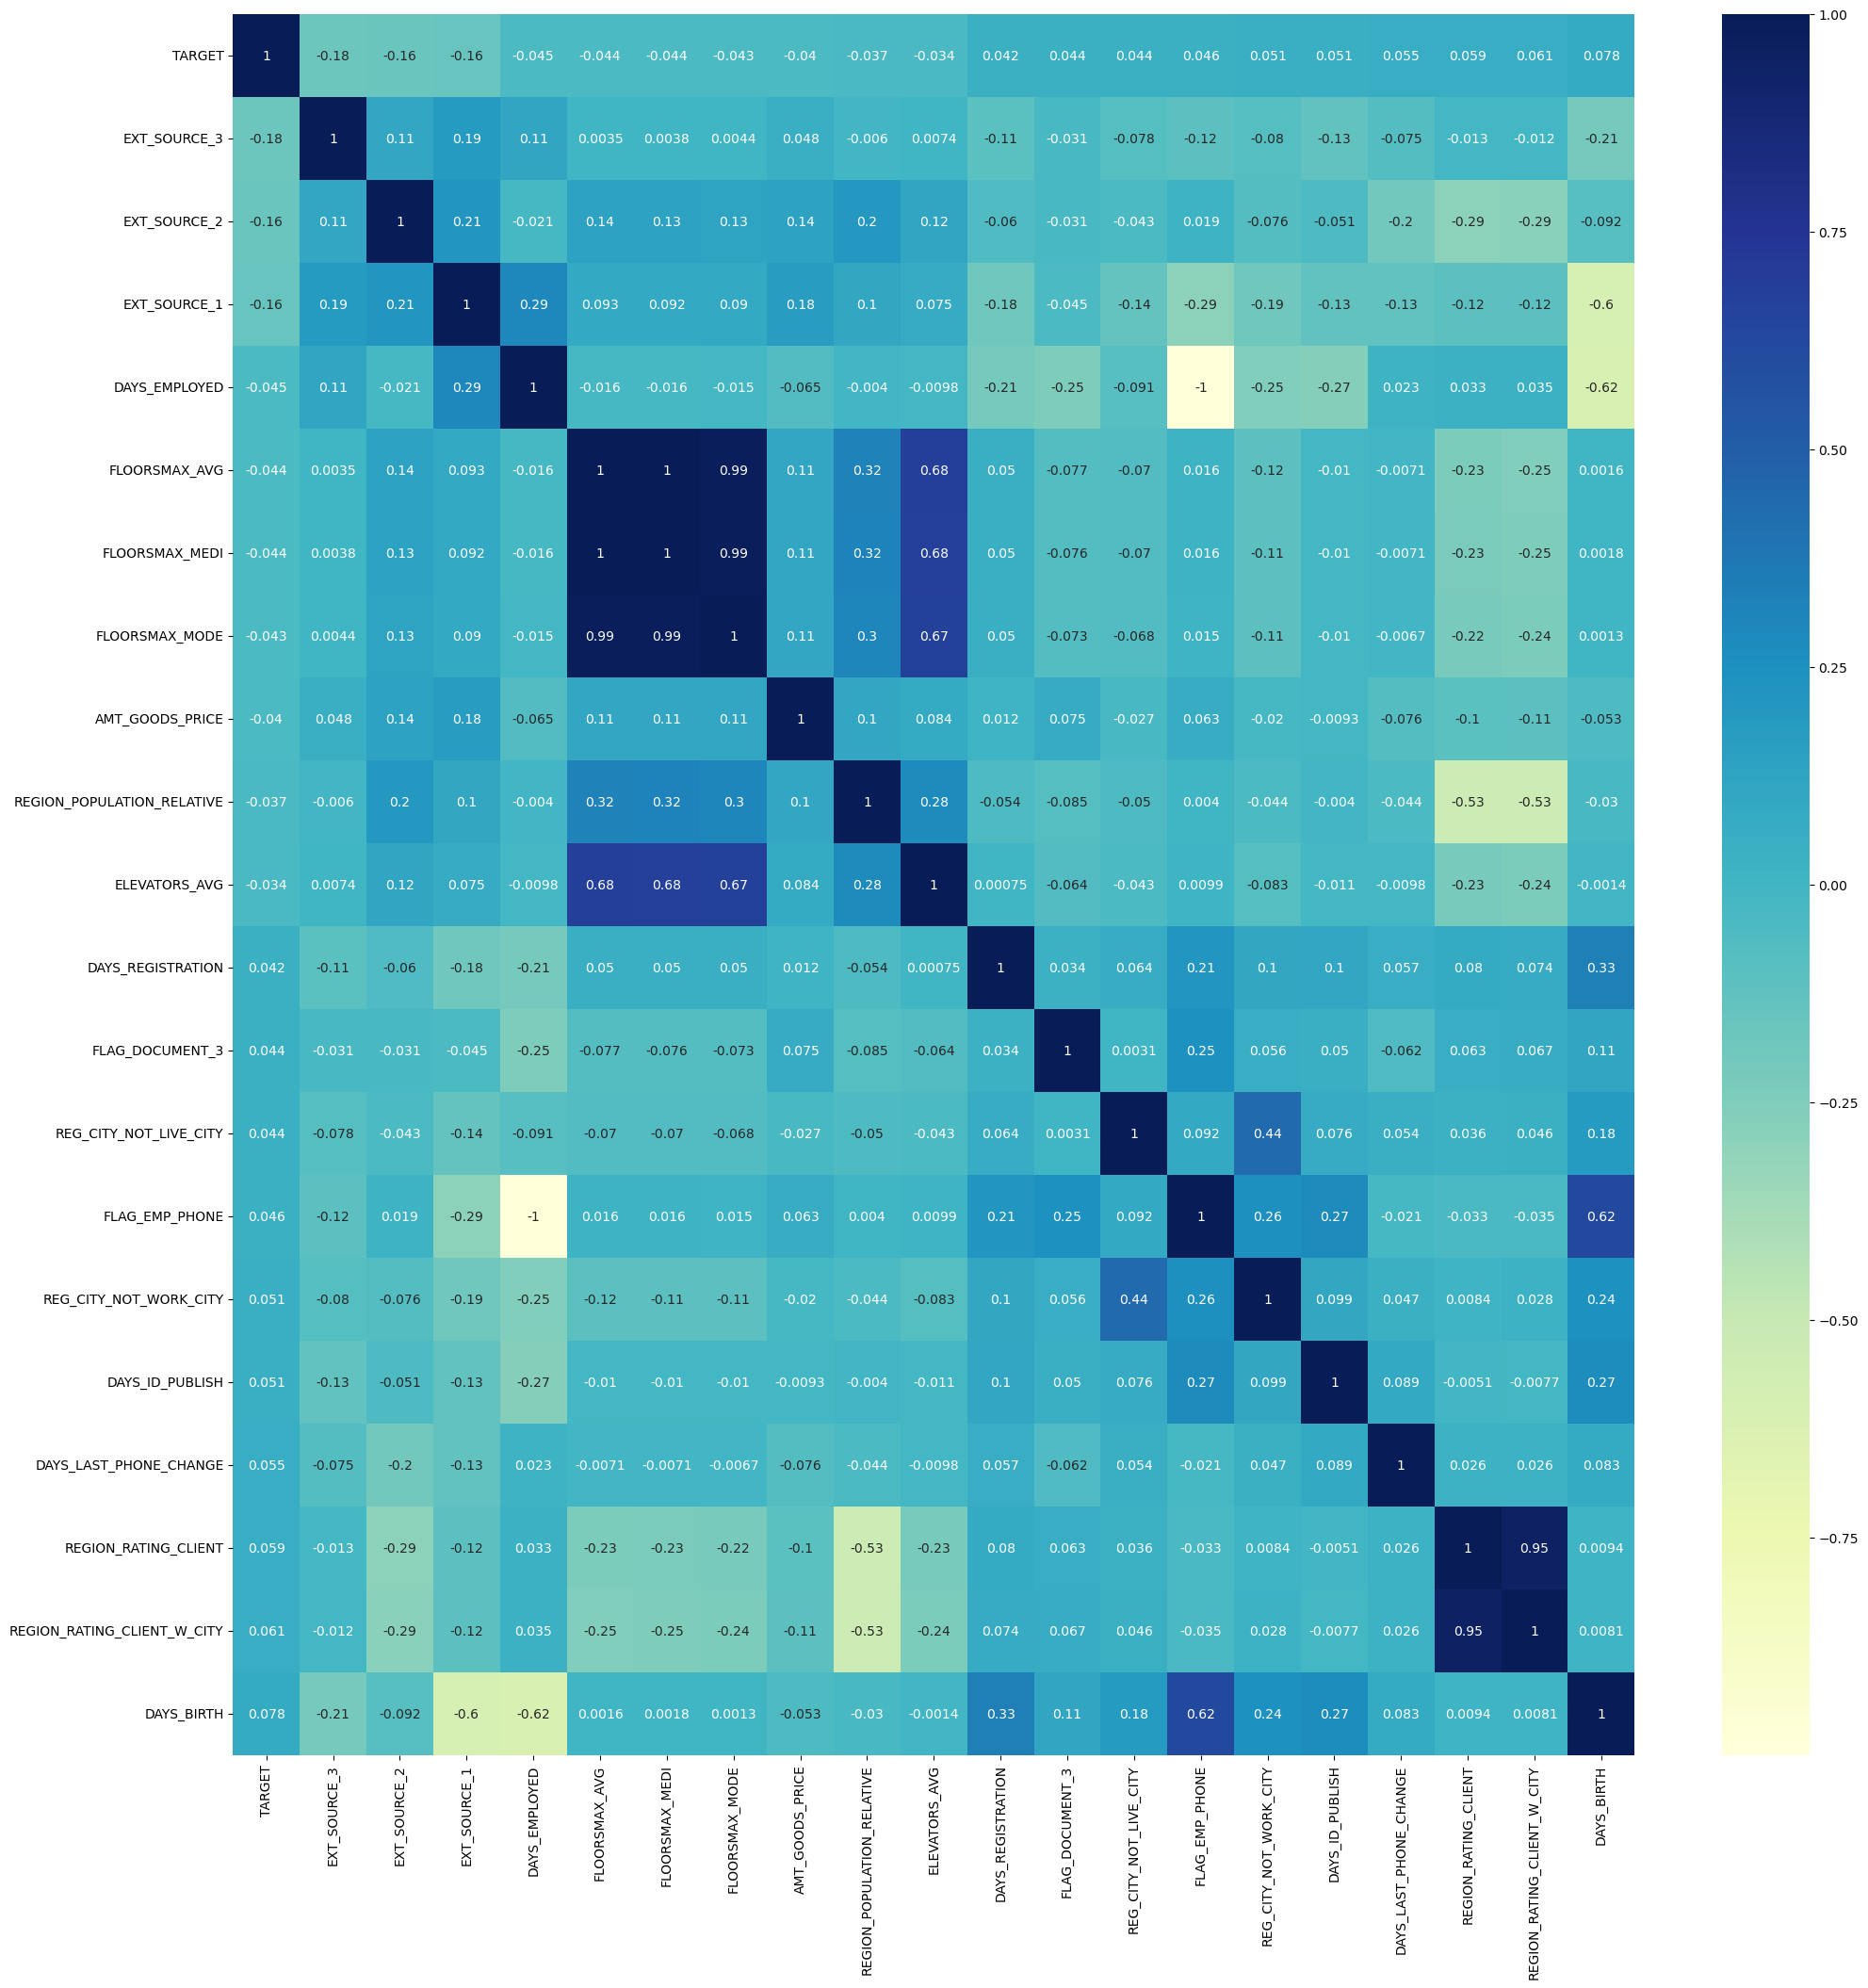

In [567]:
corr = train_data_corr.corr()
plt.figure(figsize=(24,24))
sns.heatmap(corr, annot=True, annot_kws={'size':10}, cmap="YlGnBu")

From the heatmap, we can see there are redudant features, we will only keep one of the redudant features. The features are:
- REGION_RATING_CLIENT_W CITY and REGION_RATING_CLIENT
- FLOORSMAX_AVG, FLOORSMAX_MEDI, and FLOORSMAX_MODE

# Data Preprocessing

## Joining Datasets

In [568]:
target = train_data['TARGET']
train_data = train_data.drop('TARGET', axis=1)
train_data, test_data = train_data.align(test_data, join='inner', axis=1)

In [569]:
train_data.shape, test_data.shape, target.shape

((307511, 121), (48744, 121), (307511,))

In [570]:
# Add extra variable before joining the data
train_data['training']=True
test_data['training']=False

full_data = pd.concat([train_data, test_data])
full_data = full_data.drop('SK_ID_CURR', axis=1)
full_data.shape

(356255, 121)

## Feature Engineering

In [571]:
# Drop Redundant Features with High Correlation with Target
full_data = full_data.drop(['REGION_RATING_CLIENT_W_CITY','FLOORSMAX_MEDI','FLOORSMAX_MODE'], axis=1)

In [572]:
# FLAG_DOCUMENT feature
train_data['TARGET'] = target
data_corr_FD = train_data[['TARGET', 'FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4',
                        'FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8', 
                        'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 
                        'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
                        'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
                        'FLAG_DOCUMENT_21']]
corr_FD = data_corr_FD.corr()['TARGET'].sort_values()
print('Most Positive Correlations: \n', corr_FD.tail(6))
print('\nMost Negative Correlations: \n', corr_FD.head(5))

Most Positive Correlations: 
 FLAG_DOCUMENT_5    -0.000316
FLAG_DOCUMENT_20    0.000215
FLAG_DOCUMENT_21    0.003709
FLAG_DOCUMENT_2     0.005417
FLAG_DOCUMENT_3     0.044346
TARGET              1.000000
Name: TARGET, dtype: float64

Most Negative Correlations: 
 FLAG_DOCUMENT_6    -0.028602
FLAG_DOCUMENT_16   -0.011615
FLAG_DOCUMENT_13   -0.011583
FLAG_DOCUMENT_14   -0.009464
FLAG_DOCUMENT_8    -0.008040
Name: TARGET, dtype: float64


We will keep the stand out features that have positives and negatives correlation which are FLAG_DOCUMENT_3, FLAG_DOCUMENT_6, FLAG_DOCUMENT_16, and FLAG_DOCUMENT_13. We will drop the others feature FLAG_DOCUMENT

In [573]:
full_data = full_data.drop(['FLAG_DOCUMENT_2','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5',
                              'FLAG_DOCUMENT_7','FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 
                              'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 
                              'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_17', 
                              'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
                              'FLAG_DOCUMENT_21'], axis=1)

## Handling Missing Values

In [574]:
full_data.isnull().mean()*100

NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.010105
AMT_GOODS_PRICE                  0.078034
NAME_TYPE_SUITE                  0.618377
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     66.031635
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0.000000
FLAG_WORK_PHONE                  0.000000
FLAG_CONT_MOBILE                 0

In [575]:
# Drop data with 50% > missing value
missing_value = full_data.isnull().mean()*100
missing_value[missing_value>50].index

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE',
       'LIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_MODE',
       'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'WALLSMATERIAL_MODE'],
      dtype='object')

In [576]:
full_data = full_data.drop(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
                            'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
                            'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
                            'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
                            'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
                            'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE',
                            'LIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_MODE',
                            'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
                            'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
                            'ENTRANCES_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
                            'LIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
                            'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'WALLSMATERIAL_MODE'], axis=1)

## One-Hot and Label Encoding

In [577]:
from sklearn.preprocessing import LabelEncoder
# Create a label encoder object
le = LabelEncoder()
le_count = 0
for col in full_data.columns[1:]:
    if full_data[col].dtype == 'object':
        if len(list(full_data[col].unique())) <= 2:
            le.fit(full_data[col])
            full_data[col] = le.transform(full_data[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

2 columns were label encoded.


In [578]:
# Convert rest of categorical for One Hot Encoding
full_data = pd.get_dummies(full_data)

In [579]:
full_data.shape

(356255, 178)

## Impute Missing Value

In [580]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')

In [581]:
full_data = pd.DataFrame(imputer.fit_transform(full_data), columns = full_data.columns)

In [582]:
# Checking missing values
full_data.isnull().sum()

FLAG_OWN_CAR                                         0
FLAG_OWN_REALTY                                      0
CNT_CHILDREN                                         0
AMT_INCOME_TOTAL                                     0
AMT_CREDIT                                           0
AMT_ANNUITY                                          0
AMT_GOODS_PRICE                                      0
REGION_POPULATION_RELATIVE                           0
DAYS_BIRTH                                           0
DAYS_EMPLOYED                                        0
DAYS_REGISTRATION                                    0
DAYS_ID_PUBLISH                                      0
FLAG_MOBIL                                           0
FLAG_EMP_PHONE                                       0
FLAG_WORK_PHONE                                      0
FLAG_CONT_MOBILE                                     0
FLAG_PHONE                                           0
FLAG_EMAIL                                           0
CNT_FAM_ME

## Feature Scaling

In [583]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
full_data = pd.DataFrame(scaler.fit_transform(full_data), columns = full_data.columns)

In [584]:
# Remove special character
import re
# Change columns names ([LightGBM] Do not support special JSON characters in feature name.)
full_data.columns = full_data.columns.str.replace('[^A-Za-z0-9]+','')
list(full_data)

['FLAGOWNCAR',
 'FLAGOWNREALTY',
 'CNTCHILDREN',
 'AMTINCOMETOTAL',
 'AMTCREDIT',
 'AMTANNUITY',
 'AMTGOODSPRICE',
 'REGIONPOPULATIONRELATIVE',
 'DAYSBIRTH',
 'DAYSEMPLOYED',
 'DAYSREGISTRATION',
 'DAYSIDPUBLISH',
 'FLAGMOBIL',
 'FLAGEMPPHONE',
 'FLAGWORKPHONE',
 'FLAGCONTMOBILE',
 'FLAGPHONE',
 'FLAGEMAIL',
 'CNTFAMMEMBERS',
 'REGIONRATINGCLIENT',
 'HOURAPPRPROCESSSTART',
 'REGREGIONNOTLIVEREGION',
 'REGREGIONNOTWORKREGION',
 'LIVEREGIONNOTWORKREGION',
 'REGCITYNOTLIVECITY',
 'REGCITYNOTWORKCITY',
 'LIVECITYNOTWORKCITY',
 'EXTSOURCE2',
 'EXTSOURCE3',
 'YEARSBEGINEXPLUATATIONAVG',
 'FLOORSMAXAVG',
 'LIVINGAREAAVG',
 'YEARSBEGINEXPLUATATIONMODE',
 'LIVINGAREAMODE',
 'YEARSBEGINEXPLUATATIONMEDI',
 'LIVINGAREAMEDI',
 'TOTALAREAMODE',
 'OBS30CNTSOCIALCIRCLE',
 'DEF30CNTSOCIALCIRCLE',
 'OBS60CNTSOCIALCIRCLE',
 'DEF60CNTSOCIALCIRCLE',
 'DAYSLASTPHONECHANGE',
 'FLAGDOCUMENT3',
 'FLAGDOCUMENT6',
 'FLAGDOCUMENT13',
 'FLAGDOCUMENT16',
 'AMTREQCREDITBUREAUHOUR',
 'AMTREQCREDITBUREAUDAY',
 'AMTREQ

In [585]:
full_data.head()

,FLAGOWNCAR,FLAGOWNREALTY,CNTCHILDREN,AMTINCOMETOTAL,AMTCREDIT,AMTANNUITY,AMTGOODSPRICE,REGIONPOPULATIONRELATIVE,DAYSBIRTH,DAYSEMPLOYED,DAYSREGISTRATION,DAYSIDPUBLISH,FLAGMOBIL,FLAGEMPPHONE,FLAGWORKPHONE,FLAGCONTMOBILE,FLAGPHONE,FLAGEMAIL,CNTFAMMEMBERS,REGIONRATINGCLIENT,HOURAPPRPROCESSSTART,REGREGIONNOTLIVEREGION,REGREGIONNOTWORKREGION,LIVEREGIONNOTWORKREGION,REGCITYNOTLIVECITY,REGCITYNOTWORKCITY,LIVECITYNOTWORKCITY,EXTSOURCE2,EXTSOURCE3,YEARSBEGINEXPLUATATIONAVG,FLOORSMAXAVG,LIVINGAREAAVG,YEARSBEGINEXPLUATATIONMODE,LIVINGAREAMODE,YEARSBEGINEXPLUATATIONMEDI,LIVINGAREAMEDI,TOTALAREAMODE,OBS30CNTSOCIALCIRCLE,DEF30CNTSOCIALCIRCLE,OBS60CNTSOCIALCIRCLE,DEF60CNTSOCIALCIRCLE,DAYSLASTPHONECHANGE,FLAGDOCUMENT3,FLAGDOCUMENT6,FLAGDOCUMENT13,FLAGDOCUMENT16,AMTREQCREDITBUREAUHOUR,AMTREQCREDITBUREAUDAY,AMTREQCREDITBUREAUWEEK,AMTREQCREDITBUREAUMON,AMTREQCREDITBUREAUQRT,AMTREQCREDITBUREAUYEAR,training,NAMECONTRACTTYPECashloans,NAMECONTRACTTYPERevolvingloans,CODEGENDERF,CODEGENDERM,CODEGENDERXNA,NAMETYPESUITEChildren,NAMETYPESUITEFamily,NAMETYPESUITEGroupofpeople,NAMETYPESUITEOtherA,NAMETYPESUITEOtherB,NAMETYPESUITESpousepartner,NAMETYPESUITEUnaccompanied,NAMEINCOMETYPEBusinessman,NAMEINCOMETYPECommercialassociate,NAMEINCOMETYPEMaternityleave,NAMEINCOMETYPEPensioner,NAMEINCOMETYPEStateservant,NAMEINCOMETYPEStudent,NAMEINCOMETYPEUnemployed,NAMEINCOMETYPEWorking,NAMEEDUCATIONTYPEAcademicdegree,NAMEEDUCATIONTYPEHighereducation,NAMEEDUCATIONTYPEIncompletehigher,NAMEEDUCATIONTYPELowersecondary,NAMEEDUCATIONTYPESecondarysecondaryspecial,NAMEFAMILYSTATUSCivilmarriage,NAMEFAMILYSTATUSMarried,NAMEFAMILYSTATUSSeparated,NAMEFAMILYSTATUSSinglenotmarried,NAMEFAMILYSTATUSUnknown,NAMEFAMILYSTATUSWidow,NAMEHOUSINGTYPECoopapartment,NAMEHOUSINGTYPEHouseapartment,NAMEHOUSINGTYPEMunicipalapartment,NAMEHOUSINGTYPEOfficeapartment,NAMEHOUSINGTYPERentedapartment,NAMEHOUSINGTYPEWithparents,OCCUPATIONTYPEAccountants,OCCUPATIONTYPECleaningstaff,OCCUPATIONTYPECookingstaff,OCCUPATIONTYPECorestaff,OCCUPATIONTYPEDrivers,OCCUPATIONTYPEHRstaff,OCCUPATIONTYPEHighskilltechstaff,OCCUPATIONTYPEITstaff,OCCUPATIONTYPELaborers,OCCUPATIONTYPELowskillLaborers,OCCUPATIONTYPEManagers,OCCUPATIONTYPEMedicinestaff,OCCUPATIONTYPEPrivateservicestaff,OCCUPATIONTYPERealtyagents,OCCUPATIONTYPESalesstaff,OCCUPATIONTYPESecretaries,OCCUPATIONTYPESecuritystaff,OCCUPATIONTYPEWaitersbarmenstaff,WEEKDAYAPPRPROCESSSTARTFRIDAY,WEEKDAYAPPRPROCESSSTARTMONDAY,WEEKDAYAPPRPROCESSSTARTSATURDAY,WEEKDAYAPPRPROCESSSTARTSUNDAY,WEEKDAYAPPRPROCESSSTARTTHURSDAY,WEEKDAYAPPRPROCESSSTARTTUESDAY,WEEKDAYAPPRPROCESSSTARTWEDNESDAY,ORGANIZATIONTYPEAdvertising,ORGANIZATIONTYPEAgriculture,ORGANIZATIONTYPEBank,ORGANIZATIONTYPEBusinessEntityType1,ORGANIZATIONTYPEBusinessEntityType2,ORGANIZATIONTYPEBusinessEntityType3,ORGANIZATIONTYPECleaning,ORGANIZATIONTYPEConstruction,ORGANIZATIONTYPECulture,ORGANIZATIONTYPEElectricity,ORGANIZATIONTYPEEmergency,ORGANIZATIONTYPEGovernment,ORGANIZATIONTYPEHotel,ORGANIZATIONTYPEHousing,ORGANIZATIONTYPEIndustrytype1,ORGANIZATIONTYPEIndustrytype10,ORGANIZATIONTYPEIndustrytype11,ORGANIZATIONTYPEIndustrytype12,ORGANIZATIONTYPEIndustrytype13,ORGANIZATIONTYPEIndustrytype2,ORGANIZATIONTYPEIndustrytype3,ORGANIZATIONTYPEIndustrytype4,ORGANIZATIONTYPEIndustrytype5,ORGANIZATIONTYPEIndustrytype6,ORGANIZATIONTYPEIndustrytype7,ORGANIZATIONTYPEIndustrytype8,ORGANIZATIONTYPEIndustrytype9,ORGANIZATIONTYPEInsurance,ORGANIZATIONTYPEKindergarten,ORGANIZATIONTYPELegalServices,ORGANIZATIONTYPEMedicine,ORGANIZATIONTYPEMilitary,ORGANIZATIONTYPEMobile,ORGANIZATIONTYPEOther,ORGANIZATIONTYPEPolice,ORGANIZATIONTYPEPostal,ORGANIZATIONTYPERealtor,ORGANIZATIONTYPEReligion,ORGANIZATIONTYPERestaurant,ORGANIZATIONTYPESchool,ORGANIZATIONTYPESecurity,ORGANIZATIONTYPESecurityMinistries,ORGANIZATIONTYPESelfemployed,ORGANIZATIONTYPEServices,ORGANIZATIONTYPETelecom,ORGANIZATIONTYPETradetype1,ORGANIZATIONTYPETradetype2,ORGANIZATIONTYPETradetype3,ORGANIZATIONTYPETradetype4,ORGANIZATIONTYPETradetype5,ORGANIZATIONTYPETradetype6,ORGANIZAT

# Modelling

## Data Preparation

In [586]:
df_train = full_data[full_data['training']==True]
df_train = df_train.drop('training', axis=1)
df_test = full_data[full_data['training']==False]
df_test = df_test.drop('training', axis=1)

In [587]:
print('Size of training dataset:', df_train.shape)
print('Size of testing dataset:', df_test.shape)
print('Size of target:', target.shape)
print('Size of original data_test dataset:', test_data.shape)

Size of training dataset: (307511, 177)
Size of testing dataset: (48744, 177)
Size of target: (307511,)
Size of original data_test dataset: (48744, 122)


In [588]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(df_train, target, test_size = 0.3, random_state = 200)
print("X Training shape", X_train.shape)
print("X Testing shape", X_test.shape)
print("Y Training shape", Y_train.shape)
print("Y Testing shape", Y_test.shape)

X Training shape (215257, 177)
X Testing shape (92254, 177)
Y Training shape (215257,)
Y Testing shape (92254,)


## Logistic Regression

In [589]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
logreg_pred = logreg.predict_proba(X_test)[:,1]

print("ROC",  roc_auc_score(Y_test, logreg_pred))

ROC 0.7401682410158694


## Random Forest

In [590]:
from sklearn.ensemble import RandomForestClassifier
# Train on the training data
rf_model = RandomForestClassifier() 
rf_model.fit(X_train, Y_train)
rf_pred = rf_model.predict_proba(X_test)[:, 1]

print("ROC",  roc_auc_score(Y_test, rf_pred))

ROC 0.7118939230298701


## LightGBM

In [591]:
#Light GBM 
from lightgbm import LGBMClassifier
LGB_clf = LGBMClassifier()
LGB_clf.fit(X_train, Y_train)
LGB_pred = LGB_clf.predict_proba(X_test)[:, 1]

print("ROC",  roc_auc_score(Y_test, LGB_pred))

ROC 0.7503703696581803


# Tuning Hyperparameter

## Random Forest

In [597]:
opt_rf_model = RandomForestClassifier(n_estimators=1000, 
                                      min_samples_split=10, 
                                      min_samples_leaf=5, 
                                      n_jobs=-1, 
                                      random_state=42) 
opt_rf_model.fit(X_train, Y_train)
opt_RF_pred = opt_rf_model.predict_proba(X_test)[:, 1]

print("ROC",  roc_auc_score(Y_test, opt_RF_pred))

ROC 0.7379977072902169


## Logistic Regression

In [607]:
lr = LogisticRegression(random_state=42, class_weight='balanced', C=10)
lr.fit(X_train, Y_train)
lr_pred = lr.predict_proba(X_test)[:,1]

print("ROC",  roc_auc_score(Y_test, lr_pred))

ROC 0.7409904870827466


## LightGBM

In [593]:
LGBM_clf = LGBMClassifier(n_estimators = 1000,
                          learning_rate = 0.02,
                          num_leaves = 20,
                          boosting_type='gbdt', 
                          objective='binary', 
                          metric='binary_logloss')
LGBM_clf.fit(X_train, Y_train)
LGBM_clf_pred = LGBM_clf.predict_proba(X_test)[:, 1]

print("ROC",  roc_auc_score(Y_test, LGBM_clf_pred))

ROC 0.752429652254194
